In [39]:
!pip install matplotlib_inline

In [40]:
!pip install d2l

In [41]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

Scalable Vector Graphics, 또는 SVG는 이차원 벡터 그래픽을 기술하는 XML 기반의 이미지 형식입니다. 이것은 W3C(World Wide Web Consortium)에서 개발한 오픈 표준입니다. SVG 이미지는 확장 가능하며, 이는 이미지 품질을 손실 없이 크기를 조절할 수 있음을 의미합니다.

SVG의 주요 특징은 다음과 같습니다:

벡터 그래픽: SVG 이미지는 선, 곡선, 다각형과 같은 벡터 형태로 이루어져 있습니다. 이는 픽셀로 이루어진 비트맵 이미지(JPEG 또는 PNG와 같은)와 다릅니다.

확장 가능성: 벡터 그래픽으로, SVG 이미지는 해상도 손실 없이 어떤 크기로든 확대 또는 축소될 수 있습니다. 이로써 작은 아이콘부터 큰 그래픽까지 다양한 디스플레이에 적합합니다.

텍스트 기반: SVG 파일은 인간이 읽을 수 있는 마크업 언어인 XML로 작성됩니다. 이로써 SVG 파일은 상대적으로 작은 크기로 유지되며 텍스트 편집기를 사용하여 쉽게 편집할 수 있습니다.

대화형 요소: SVG는 대화형 요소와 스크립팅을 지원하여 동적 콘텐츠 및 사용자 상호 작용을 가능하게 합니다. 이는 웹 애플리케이션 및 데이터 시각화에 적합하게 만듭니다.

CSS 스타일링: SVG 그래픽은 CSS를 사용하여 스타일을 지정할 수 있습니다. 이를 통해 디자이너는 색상, 그라데이션, 애니메이션과 같은 스타일을 적용할 수 있습니다.

SVG는 웹에서 아이콘, 로고, 차트 및 일러스트레이션과 같은 다양한 용도로 널리 사용되고 있습니다. 대부분의 현대 웹 브라우저에서 지원되므로 인터넷 상에서 시각적으로 매력적이고 확장 가능한 그래픽을 만드는 데에 적합한 형식입니다.

In [42]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('png')

In [43]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root = "../data", train = True, transform = trans, download = True) ## 빈칸을 채워주세요.## , transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(
    root = "../data", train = False, transform = trans, download = False) ## 빈칸을 채워주세요.## , transform=trans, download=True)

In [44]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [45]:
mnist_train[0][0].shape  # mnist_train의 차원이 3차원임을 확인

torch.Size([1, 28, 28])

In [46]:
def get_fashion_mnist_labels(labels):
  """Fashion-MNIST를 위한 텍스트라벨을 리턴"""
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels] ## 빈칸을 채워주세요.##

In [47]:
# visualize example

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  """이미지 리스트 플롯그리기"""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      #img = img.permute(1, 2, 0)  # 텐서와 맷플롯립 호환을 위해 permute 변환 (행 열 채널) .. 근데 그림이 안그려지
      ax.imshow(img.squeeze()) # 변환 안될경우 차선
      ax.imshow(img)
      # Tensor Image
      ## 빈칸을 채워주세요. ##
    else:
      ax.imshow(img)
      # PIL Image
      ## 빈칸을 채워주세요. ##
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes


In [48]:
!pip install matplotlib==3.7.2

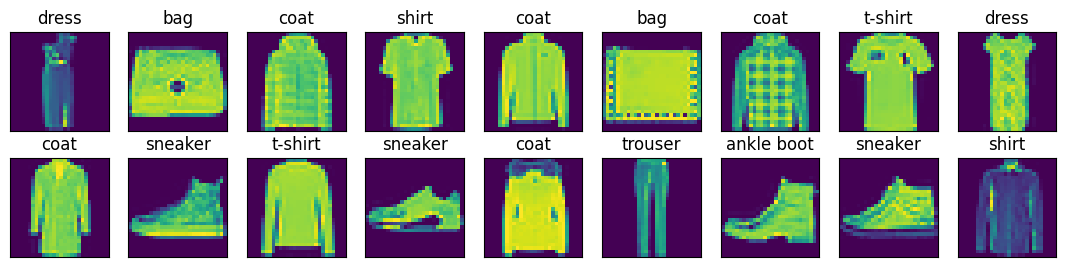

In [49]:
# training dataset 가져오기


# DataLoader 생성
train_data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=18, shuffle=True)

# 학습 데이터셋에서 배치 가져오기
X, y = next(iter(train_data_loader))
show_images(X.reshape(18,28,28), 2, 9, titles = get_fashion_mnist_labels(y));

In [50]:
# Reading a Minibatch
batch_size = 256

def get_dataloader_workers():
  """Use 4 processes to read the data."""
  return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers = get_dataloader_workers())

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [51]:
# training data 읽는 시간 체크

timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f}.sec'

'9.24.sec'

In [52]:
# Putting All Things Together

def load_data_fashion_mnist(batch_size, resize=None):
  """Fashion-MNIST dataset 을 다운로드하고 memory로 로드"""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root = "../data", train= True, transform=trans, download=True)
  mnist_test = torchvision.datasets.FashionMNIST(
      root="../data", train= False , transform=trans, download=True)
  return(data.DataLoader(mnist_train, batch_size, shuffle= True,
                         num_workers = 4),
         data.DataLoader(mnist_test, batch_size, shuffle= True,
                         num_workers = 4))


In [53]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 3.6 Implementation of Softmax Regression from Scratch

**코드 한 줄 한 줄이 어떤 이유로 쓰였는지 씹어보며 공부해보세요! 😀**

In [54]:
import torch
from IPython import display
from d2l import torch as d2l

In [55]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [56]:
# image flatten to vectors of length 784.
# 각 pixel 위치를 feature로 봄
# class 가 10개니까 아웃풋 dimension이 10
# Gaussian 노이즈로 W 초기값 설정
# 0으로 b 초기값 설정

num_inputs = 784
num_outputs = 10
W = torch.normal(0, 0.01, size = (num_inputs, num_outputs), requires_grad= True) ## W, b를 역전파를 통해 업데이트 해줄거기 때문에 필요함. 단층 퍼셉트론
b = torch.zeros(num_outputs, requires_grad = True)

In [57]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0,5.0,6.0]])
X.sum(0, keepdim = True), X.sum(1, keepdim=True)  # 행 방향으로 합 계산 // 열방향으로 합 계산


(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [58]:
# keepdim = False로 하면? 결과가 모두 1차원 텐서가 됨. 합산된 텐서가 제거되었기 때문
X.sum(0, keepdim = False), X.sum(1, keepdim=False)

(tensor([5., 7., 9.]), tensor([ 6., 15.]))

In [59]:
# softmax 함수를 구현해보세요.

def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdims = True)   # 열 방향으로 합산
  return X_exp / partition

소프트맥스에서 사용하는 지수함수의 값이 매우 크고,  (ex: exp(10) > 20000, exp(1000) ~= inf)
큰 값끼리 나눗셈을 하면 결과 수치가 불안해진다.
따라서 소프트맥스 함수의 성질을 이용해 함수 구현을 개선할 수 있다.



In [60]:
''' 오버플로우를 방지하는 소프트맥스 코드

import torch

def safe_softmax(X):
    # 입력에서 최댓값 찾기
    max_vals, _ = torch.max(X, dim=1, keepdim=True)

    # 입력에서 최댓값을 빼서 안정성 향상
    X_exp = torch.exp(X - max_vals) - 지수함수이기에 분모, 분자가 각각 1에 근접하기 때문

    # 각 행에 대해 지수의 합 계산
    partition = X_exp.sum(1, keepdim=True)

    # 안전한 소프트맥스 함수 계산
    softmax_output = X_exp / partition

    return softmax_output

'''
'''
numpy 구현

import numpy as np

def safe_softmax(x):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

'''

'\nnumpy 구현\n\nimport numpy as np\n\ndef safe_softmax(x):\n  c = np.max(a)\n  exp_a = np.exp(a-c)\n  sum_exp_a = np.sum(exp_a)\n  y = exp_a / sum_exp_a\n\n  return y\n\n'

In [61]:
X = torch.normal(0, 1, (2,5))  # 2*5 사이즈의 텐서, 각 원소는 평균 0, 표준편차 1의 랜덤값
X_prob = softmax(X)
X_prob, X_prob.sum(1) # 각 행의 확률값을 합산. 아까 열 방향으로 합산했기 때문에 합이 1일수밖에 없음

(tensor([[0.2549, 0.1437, 0.1018, 0.3886, 0.1109],
         [0.0706, 0.1287, 0.0627, 0.6803, 0.0577]]),
 tensor([1., 1.]))

In [62]:
print(softmax(X))

tensor([[0.2549, 0.1437, 0.1018, 0.3886, 0.1109],
        [0.0706, 0.1287, 0.0627, 0.6803, 0.0577]])


In [63]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b) # net = softmax(XW + b), X.reshape(-1, W.shape[0] = 784)은 X를 (1,784)의 2차원으로 바꿔줌 - W와의 행렬곱을 위해 차원 변경
  # 즉 (1,784)*(784,10)+(1,10)이기에 (1,10)으로 텐서가 계산됨. - 10개의 요소를 가짐

In [64]:
import torch

y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]]) # 각각 레이블이 0, 1, 2일 확률 // 0일확률 0.1, 2일 확률 0.5
y_hat[[0,1], y]

# y_hat에서 선택된 확률 값 가져오기
# 주어진 예측 텐서 y_hat에서 주어진 인덱스(실제 레이블) y에 해당하는 확률을 선택하는 작업을 수행

# 코드 작동 방식을 보면, 첫번째 차원에서 각각 0, 1(행)을 선택하고 두번째 차원에서 y를 열 인덱스로 선택

tensor([0.1000, 0.5000])

In [65]:
print(len(y_hat))

2


In [66]:
# cross-entropy loss function을 구현해보세요.

def cross_entropy(y_hat, y):
  ## 빈칸을 채워주세요. ##
  return -torch.log(y_hat[range(len(y_hat)), y])  # len(y_hat) =2 , range(2) = [0,1] 따라서 y_hat[[0,1],[0,2]] = [0.1, 0.5], 즉, [-log(0.1), -log(0.5))

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [67]:
def accuracy(y_hat, y):
  """correct prediction 수를 계산"""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # 차원이 1보다 크고 열 개수가 1보다 크면, 즉 y_hat이 확률값을 담고 있을 때 동작
    y_hat = y_hat.argmax(axis = 1) # 각 행에 대해 확률이 가장 높은 클래스의 인덱스를 y_hat에 저장, 여기선 [2,2]에 해당
  cmp = y_hat.type(y.dtype) == y #y_hat과 y를 비교해 같은 값이면 cmp에 저장
  return float(cmp.type(y.dtype).sum()) # True의 개수를 세서 부동소수점 형태로 저장

In [68]:
accuracy(y_hat, y) / len(y)

0.5

if isinstance(net, torch.nn.Module):

이 코드는 주어진 net이 PyTorch의 torch.nn.Module 클래스의 인스턴스인지 확인하고, 만약 그렇다면 net.eval()을 호출하여 모델을 평가(evaluation) 모드로 전환합니다.

모델을 평가 모드로 전환하면 훈련 중에 사용되는 기능들 중 일부가 비활성화되어 예측이나 평가와 관련된 부분만 활성화됩니다. 주로 드롭아웃(dropout)이나 배치 정규화(batch normalization)와 같은 계층들이 테스트 시에는 다르게 동작하도록 하기 위해 사용됩니다.

In [97]:
def evaluate_accuracy(net, data_iter):
    """모델 정확도 계산"""
    if isinstance(net, torch.nn.Module): # net과 torch.nn.Module이 같은 type인지 확인
      net.eval() # backpropagation 시 parameter의 변환이 없게 막음 - 메모리 아낌 (torch.no_grad()와 동일한 역할)
    metric = Accumulator(2)  # [[0], [0]]

    with torch.no_grad(): # net 함수를 쓸 때 net에 대한 evaluation에 따라 parameter 변환을 막기 위해 사용
      for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel()) # metric[0]에 정확도를 계속 더해나감, numel은 성분의 총 개수를 구하는 함수
    return metric[0] / metric[1]

2
tensor([0, 2])


In [70]:
class Accumulator:
    """n 개 변수 합 축적"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [71]:
evaluate_accuracy(net, test_iter)  # net은 softmax, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 0.1에 가까운 값이 나와야 함(학습 전이기에, 클래스가 10개 이므로 random에 가까운 확률이 나와야 하기 때문)

0.1669

In [77]:
def train_epoch(net, train_iter, loss, updater):
    """training loop"""
    # Set the model to training model
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, number of examples
    metric = Accumulator(3)  # [0], [0], [0] 초기화
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.mean().backward() ## 빈칸을 채워주세요. ## backward만 썼을 때는 'backward' 함수가 불러지지 않기에 backward()를 써야함
            updater.step()
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward() ## 빈칸을 채워주세요. ##
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [78]:
class Animator:
    """애니메이션으로 데이터 플롯팅"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


In [79]:
def train(net, train_iter, test_iter, loss, num_epochs, updater):
    """모델 학습"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc


In [80]:
lr = 0.1

def updater(batch_size):
  return d2l.sgd([W, b], lr, batch_size)

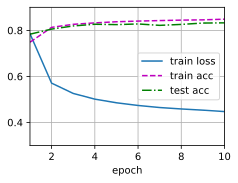

In [81]:
num_epochs = 10
train(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

# 일반 sgd를 갖고와도 오류 발생...

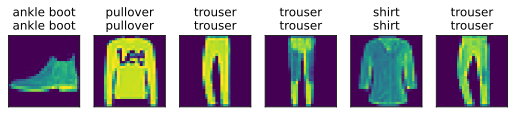

In [82]:
def predict(net, test_iter, n=6):
  for X, y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis = 1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(
      X[0:n].reshape((n, 28, 28)), 1 , n, titles = titles[0:n])
predict(net, test_iter)

In [83]:
import torch
from torch import nn
from d2l import torch as d2l

In [84]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)

In [86]:
loss = nn.CrossEntropyLoss(reduction = 'none')

In [87]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)

In [95]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer) # d2l 버전 업데이트로 인한 문제로 판단

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

## 세션 때 배운 코드를 복습해봐요 😀

**강의자료 보지않고 빈 칸 채워보기!**

# Numpy

### data generation

In [ ]:
import numpy as np

true_b = 1
true_w = 2

N = 100

np.random.seed(42)
x = np.random.rand(N,1)  # Uniform
epsilon = (0.1 * np.random.randn(N,1))  # standard normal dist  # noise
y = true_b + true_w * x + epsilon ## 빈칸을 채워주세요. ##

### Train-Validation Split

In [ ]:
# Shuffles the indices
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index]## 빈칸을 채워주세요. ##]
val_idx = idx[split_index:]## 빈칸을 채워주세요. ##]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

### Gradient Descent for Linear Regression

In [ ]:
# 실행시간을 측정해주는 Decorator 입니다.

import time
def timer(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Execution time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

In [ ]:
@timer
def train_model_numpy(lr = 0.1, epochs = 1000):
  # Initialize parameters
  b = np.random.randn(1)
  w = np.random.randn(1)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    mse_loss = np.mean(error ** 2) ## 빈칸을 채워주세요. ##

    # Gradient computation
    b_grad = 2 * np.mean(error)## 빈칸을 채워주세요. ## 미분 어떻게 했었죠?ㅎㅎ
    w_grad = 2 * np.mean(x_train * error) ## 빈칸을 채워주세요. ##
    b = b - lr * b_grad
    w = w - lr * w_grad
  return b, w


In [ ]:
b, w = train_model_numpy()
print("b_estimate:{}, w_estimate:{}".format(b,w))

# Pytorch

### Data Generation

In [ ]:
import torch

# create tensor at CPU:
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

# create tensor ar GPU:
## 빈칸을 채워주세요. ##  # GPU가 현재 연결이 되어있다면 cuda를 콜하겠다. 아니면 cpu 쓰겠다! 하는 코드

device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)


### Gradient Descent

In [ ]:
@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)## 빈칸을 채워주세요. ##)
  w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device) ## 빈칸을 채워주세요. ##)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    error = (y_hat - y_train_tensor)
    mse_loss = torch.mean(error ** 2)## 빈칸을 채워주세요. ##
    # Gradient computation and descent
    mse_loss.backward()
    with torch.no_grad():## 빈칸을 채워주세요. ## # 경사 하강법 할 땐 auto grad 끄고 하는 게 좋죠!
      b -= lr * b.grad## 빈칸을 채워주세요. ##  # in-place operation 써줘야합니다!
      w -= lr * w.grad## 빈칸을 채워주세요. ##
    b.grad.zero_()## 빈칸을 채워주세요. ## # gradient 초기화 시켜줘야해요. 안 하면 누적합으로 계산하기 때문에!
    w.grad.zero_()## 빈칸을 채워주세요. ##
  return b, w

In [ ]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))

**optimizer 를 사용해서 gradient descent 를 하는 방법도 있어요!**

In [ ]:
import torch.optim as optim
import torch.nn as nn

@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  parameters = [b, w]
  optimizer = optim.SGD(parameters, lr = lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient computation and descent
    loss.backward()
    optimizer.step() # 경사하강법 연산, step 한 번을 밟는다!
    optimizer.zero_grad()
  return b, w

In [ ]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))